In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"poratori","key":"c14ad3ceb870f21724fe342c2e95f1ff"}'}

# 새 섹션

In [2]:
!pip install -q kaggle

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ 
!chmod 600 ~/.kaggle/kaggle.json 

In [4]:
!kaggle competitions download -c kakr-4th-competition

  0% 0.00/399k [00:00<?, ?B/s]
100% 399k/399k [00:00<00:00, 76.8MB/s]
  0% 0.00/683k [00:00<?, ?B/s]
100% 683k/683k [00:00<00:00, 88.7MB/s]
  0% 0.00/43.4k [00:00<?, ?B/s]
100% 43.4k/43.4k [00:00<00:00, 43.6MB/s]


In [5]:
!kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                                  429KB  2020-11-14 13:00:04           3941  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University          2MB  2020-11-15 06:04:38           1210  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                           353MB  2020-11-09 18:51:59           2199  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates           199MB  2020-10-23 16:56:10            419  
etsc9287/2020-general-election-polls                    Election, COVID, and Demographic Data by Cou

In [6]:
!ls

kaggle.json  sample_data  sample_submission.csv  test.csv  train.csv.zip


In [7]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
train.head(3)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K


In [11]:
num_col = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
train_num = train[num_col]

In [12]:
# drop column : education, relationship
cat_col = ['workclass','marital_status','occupation','race','sex','native_country']
train_cat = train[cat_col]

In [13]:
# marital_status : Married-civ-spouse (1) / Not Married-civ-spouse (0)
train_cat['marital_status_adj'] = (train_cat['marital_status'] == 'Married-civ-spouse').astype('int')
# column drop
train_cat = train_cat.drop('marital_status', axis=1)

In [14]:
# ? => etc
for column in train_cat.columns :
  train_cat.loc[train_cat[column] == '?',column] = 'etc'

In [15]:
train_cat.head(3)

,workclass,occupation,race,sex,native_country,marital_status_adj
0,Private,Sales,White,Male,United-States,1
1,Private,Machine-op-inspct,White,Male,United-States,0
2,Private,Other-service,White,Male,United-States,0


In [16]:
# categroy => onehot
train_cat_onehot = pd.get_dummies(train_cat)

In [17]:
# number => minmax sclae
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train_num)

train_num_scale = pd.DataFrame(scaler.transform(train_num))
train_num_scale.columns = train_num.columns

In [18]:
train_input = pd.merge(train_num_scale, train_cat_onehot, left_index=True, right_index=True)

In [19]:
# train['income'].value_counts()
train_label = (train['income'] == '<=50K').astype('int')

In [20]:
from sklearn.model_selection import train_test_split

num_test = 0.20
x_input, y_input, x_label, y_label = train_test_split(train_input, train_label, test_size=num_test, random_state=23)

In [21]:
print(len(x_input))
print(len(y_input))
print(len(x_label))
print(len(y_label))

20839
5210
20839
5210


In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
from sklearn.metrics import f1_score

In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_input, x_label)
y_pred = logreg.predict(y_input)
f1_score(y_label, y_pred, average='micro')
# acc_logreg = round(f1_score(y_label, y_pred, average='weighted') * 100, 2)
# print(f1_score)

0.8393474088291748

In [26]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_input, x_label)
y_pred = svc.predict(y_input)
f1_score(y_label, y_pred, average='micro')
# acc_logreg = round(f1_score(y_label, y_pred, average='weighted') * 100, 2)
# print(f1_score)

0.8299424184261036

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboostingclassifier = GradientBoostingClassifier()
gradientboostingclassifier.fit(x_input, x_label)
y_pred = gradientboostingclassifier.predict(y_input)
f1_score(y_label, y_pred, average='micro')
# acc_logreg = round(f1_score(y_label, y_pred, average='weighted') * 100, 2)
# print(f1_score)

0.8602687140115162

In [29]:
from sklearn.ensemble import RandomForestClassifier

randomforestclassifier = RandomForestClassifier()
randomforestclassifier.fit(x_input, x_label)
y_pred = randomforestclassifier.predict(y_input)
f1_score(y_label, y_pred, average='micro')
# acc_logreg = round(f1_score(y_label, y_pred, average='weighted') * 100, 2)
# print(f1_score)

0.8477927063339731

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(train_input)
pca_train_input = pca.transform(train_input)

pca_train_input = pd.DataFrame(pca_train_input, columns=['x_axis','y_axis'])
pca_train_input.head(3)

,x_axis,y_axis
0,-0.854170,-0.166886
1,0.212024,-0.874245
2,0.291068,-0.843369


In [31]:
pca_train = pd.merge(pca_train_input, train_label, left_index=True, right_index=True)
pca_train.head(3)

,x_axis,y_axis,income
0,-0.854170,-0.166886,0
1,0.212024,-0.874245,1
2,0.291068,-0.843369,1


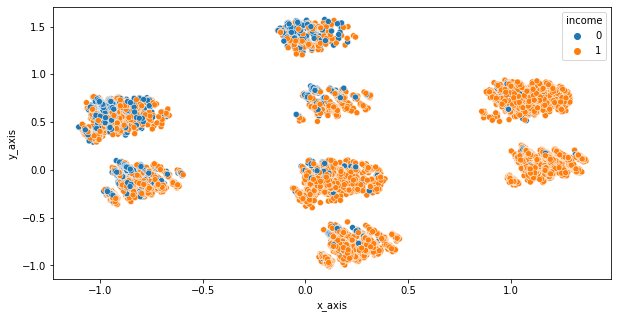

In [32]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=pca_train,
                x="x_axis",
                y="y_axis",
                hue="income")

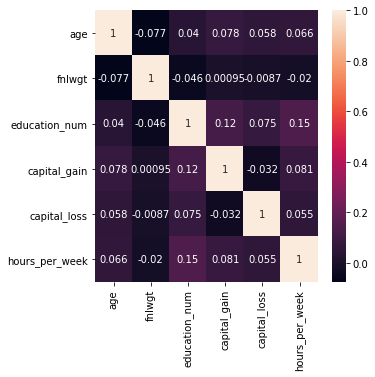

In [33]:
plt.figure(figsize=(5,5))
ax = sns.heatmap(train_num.corr(), annot=True)